In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df= pd.read_csv("books.csv")
# print(df)

In [34]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 399
Number of columns: 24


In [35]:
# get the number of books without the original title.
booksWithout_orig_title = df["original_title"].isnull().sum()

print(f"Number of the books without the original title is = {booksWithout_orig_title}")

Number of the books without the original title is = 36


In [36]:
# Remove rows with null values in the 'original_title' column
df_without_orig_title = df.dropna(subset=["original_title"])

# Count the number of unique books based on 'book_id'
unique_books_count = df_without_orig_title["book_id"].nunique()

print(f"Number of unique books based on 'book_id' after removing null values in original_title: {unique_books_count}")

Number of unique books based on 'book_id' after removing null values in original_title: 363


In [37]:
# Calculate the average rating
average_rating = df["average_rating"].mean()

print(f"Average rating of all books based on average_rating: {average_rating:.3f}")
#here we are using .3f to round off the average to 3 decimal values

Average rating of all books based on average_rating: 3.984


In [38]:
# Filter books published in the year 2000
books_2000 = df[df["original_publication_year"] == 2000]

# Count the number of books published in the year 2000
num_books_2000 = books_2000.shape[0]

print(f"Number of books published in the year 2000: {num_books_2000}")

Number of books published in the year 2000: 8


In [39]:
# Find the book with the maximum number of ratings based on the Work rating count
max_ratings_book_index = df["work_ratings_count"].idxmax()
max_ratings_book_title = df.loc[max_ratings_book_index, "title"]

print(f"Book with the maximum number of ratings based on the work rating count: {max_ratings_book_title}")

Book with the maximum number of ratings based on the work rating count: The Diary of a Young Girl


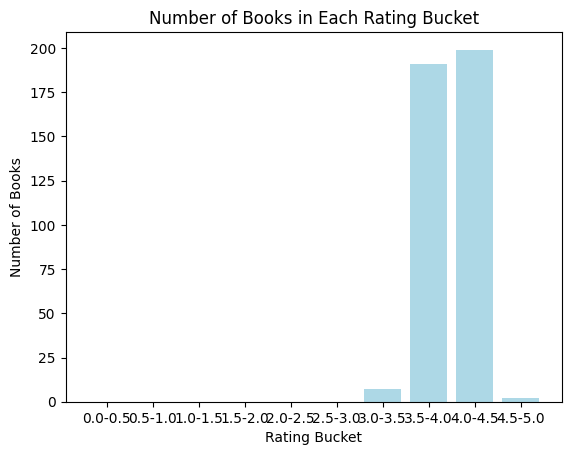

In [40]:
# Define the rating buckets and labels
rating_bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
rating_labels = [f'{i:.1f}-{i+0.5:.1f}' for i in rating_bins[:-1]]

# Create a new column 'rating_bucket' based on 'average_rating'
df["rating_bucket"] = pd.cut(df["average_rating"], bins=rating_bins, labels=rating_labels, right=False)

# Count the number of books in each rating bucket
rating_counts = df["rating_bucket"].value_counts().sort_index()

# Plotting the bar graph
plt.bar(rating_counts.index, rating_counts.values, color='lightblue')
plt.xlabel("Rating Bucket")
plt.ylabel("Number of Books")
plt.title("Number of Books in Each Rating Bucket")
plt.show()